In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('language_detection.csv')

df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [74]:
df.shape

(10337, 2)

In [76]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [78]:
df['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [80]:
df['Text'] = df['Text'].str.lower().str.strip()
df.head(10)

,Text,Language
0,"nature, in the broadest sense, is the natural,...",English
1,"""nature"" can refer to the phenomena of the phy...",English
2,"the study of nature is a large, if not the onl...",English
3,"although humans are part of nature, human acti...",English
4,[1] the word nature is borrowed from the old f...,English
5,"[2] in ancient philosophy, natura is mostly us...",English
6,"[3][4] \nthe concept of nature as a whole, the...",English
7,during the advent of modern scientific method ...,English
8,"[5][6] with the industrial revolution, nature ...",English
9,"however, a vitalist vision of nature, closer t...",English


In [82]:
import re
def clean_text(text):
# Remove citations like [1], [2], [3][4]
    text = re.sub(r'\[\d+\]', '', text)
    
    # Remove extra quotes
    text = text.replace('"','')
    
    # Remove newlines
    text = text.replace('\n',' ')

    # Remove Whitespace cleaning
    text = re.sub(r'\s+', ' ', text)
    
    # Strip again just in case
    text = text.strip()
    
    return text

df['Text'] = df['Text'].apply(clean_text)
df.head(2)

,Text,Language
0,"nature, in the broadest sense, is the natural,...",English
1,nature can refer to the phenomena of the physi...,English


In [83]:
X = df['Text']
y = df['Language']

In [86]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test, stratified to maintain language proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
# stratify keeps all 17 languages represented proportionally

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


# Build Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(1,3))),
    ('classifier', MultinomialNB())
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9850096711798839


In [98]:
# Training accuracy
y_train_pred = pipeline.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# Testing accuracy
y_test_pred = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9871810376103519
Testing Accuracy: 0.9850096711798839


Classification Report:

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       107
      Danish       1.00      0.88      0.94        86
       Dutch       0.98      0.95      0.97       109
     English       0.95      1.00      0.97       277
      French       0.98      0.99      0.99       203
      German       1.00      0.97      0.98        94
       Greek       1.00      1.00      1.00        73
       Hindi       1.00      1.00      1.00        12
     Italian       0.99      0.98      0.99       140
     Kannada       1.00      1.00      1.00        74
   Malayalam       1.00      1.00      1.00       119
  Portugeese       0.99      0.99      0.99       148
     Russian       1.00      0.99      0.99       138
     Spanish       0.99      0.98      0.98       164
    Sweedish       0.96      0.99      0.97       135
       Tamil       1.00      1.00      1.00        94
     Turkish       1.00      1.00      1.00        95

  

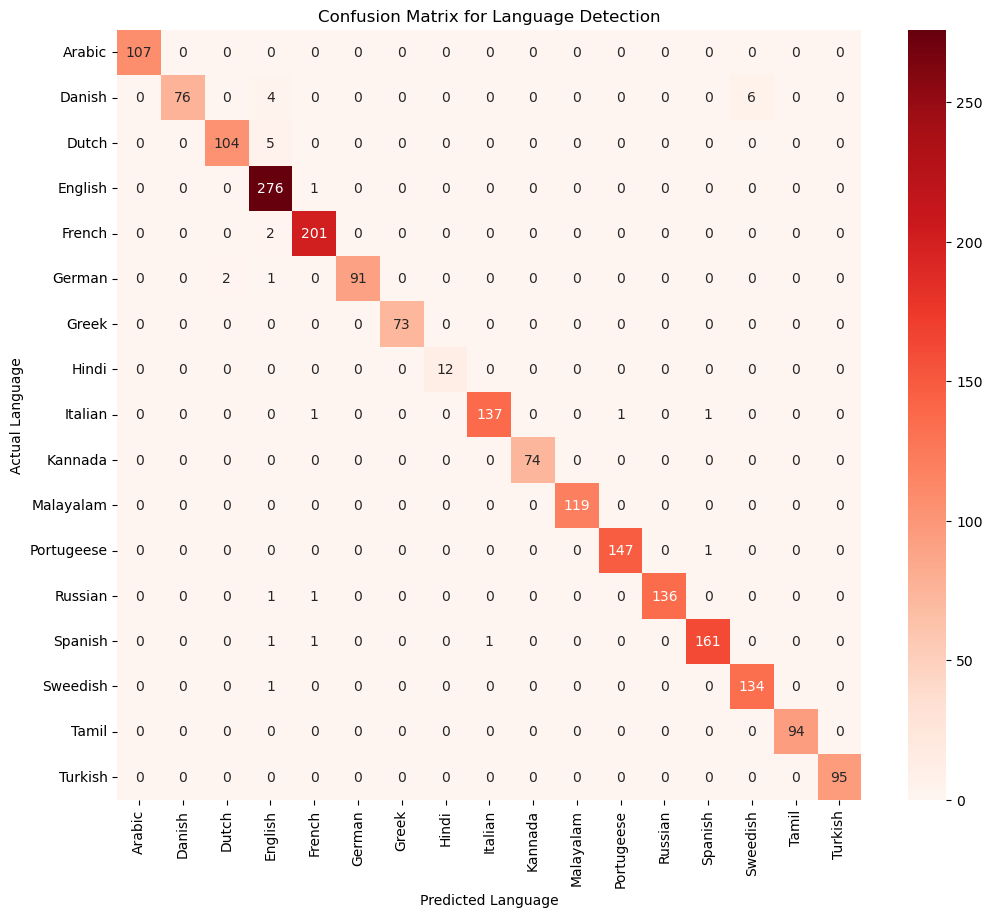

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

# Plot confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Language')
plt.ylabel('Actual Language')
plt.title('Confusion Matrix for Language Detection')
plt.show()

In [100]:
import re

def detect_language(text):
    """
    Input: a string of text
    Output: predicted language (from your 17-language model)
    """
    # Cleaning steps (same as training)
    text = text.lower().strip()                      # lowercase and strip
    text = re.sub(r'\[\d+\]', '', text)             # remove citations like [1], [2]
    text = text.replace('"','')                      # remove quotes
    text = text.replace('\n',' ')                    # replace newlines with space
    text = re.sub(r'\s+', ' ', text)                # collapse multiple spaces
    
    # Prediction using trained pipeline
    language = pipeline.predict([text])[0]
    
    return language

In [104]:
text = 'Hey, my name is Adeel'

In [106]:
print(detect_language(text))

English


In [108]:
text = 'Hola, me gusta aprender'

In [110]:
print(detect_language(text))

Spanish


In [112]:
text = 'Bonjour, je m’appelle Pierre et j’aime le chocolat.'

In [114]:
print(detect_language(text))

French


In [116]:
import joblib

# Save pipeline
joblib.dump(pipeline, 'language_detector_pipeline.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!
